In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/indian_liver_patient.csv")
df.shape

(583, 11)

In [4]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [6]:
df.rename(columns={'Dataset':'target'},inplace=True)
df.head().T

,0,1,2,3,4
Age,65,62,62,58,72
Gender,Female,Male,Male,Male,Male
Total_Bilirubin,0.7,10.9,7.3,1,3.9
Direct_Bilirubin,0.1,5.5,4.1,0.4,2
Alkaline_Phosphotase,187,699,490,182,195
Alamine_Aminotransferase,16,64,60,14,27
Aspartate_Aminotransferase,18,100,68,20,59
Total_Protiens,6.8,7.5,7,6.8,7.3
Albumin,3.3,3.2,3.3,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1,0.4


In [7]:
le = LabelEncoder()
le.fit(df.Gender.unique())
df['Gender'] = le.transform(df.Gender)
df.head().T

,0,1,2,3,4
Age,65.0,62.00,62.00,58.0,72.0
Gender,0.0,1.00,1.00,1.0,1.0
Total_Bilirubin,0.7,10.90,7.30,1.0,3.9
Direct_Bilirubin,0.1,5.50,4.10,0.4,2.0
Alkaline_Phosphotase,187.0,699.00,490.00,182.0,195.0
Alamine_Aminotransferase,16.0,64.00,60.00,14.0,27.0
Aspartate_Aminotransferase,18.0,100.00,68.00,20.0,59.0
Total_Protiens,6.8,7.50,7.00,6.8,7.3
Albumin,3.3,3.20,3.30,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1.0,0.4


In [8]:
X = df.drop("target", axis = 1)
y = df["target"]

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(408, 10) (408,) (175, 10) (175,)


In [12]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=0, gamma='auto')
svm_model.fit(X_train,y_train)
y_pred_svc = svm_model.predict(X_test)
cm_svc = confusion_matrix(y_test,y_pred_svc)
print(cm_svc)

accuracy_svc = accuracy_score(y_test,y_pred_svc)
print('The accuracy of SVM is : ', str(accuracy_svc*100) , '%')

[[125   0]
 [ 50   0]]
The accuracy of SVM is :  71.42857142857143 %


In [13]:
sv_train_score=svm_model.score(X_train, y_train)
sv_test_score=svm_model.score(X_test, y_test)
print('The accuracy of the svm classifier on training data is {:.2f} '.format(sv_train_score))
print('The accuracy of the svm classifier on test data is {:.2f}'.format(sv_test_score))

The accuracy of the svm classifier on training data is 0.72 
The accuracy of the svm classifier on test data is 0.71


In [14]:
y_pred = svm_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[125   0]
 [ 50   0]]
0.7142857142857143


In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.71      1.00      0.83       125
           2       0.00      0.00      0.00        50

   micro avg       0.71      0.71      0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175



C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.71      1.00      0.83       125
           2       0.00      0.00      0.00        50

   micro avg       0.71      0.71      0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175



C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


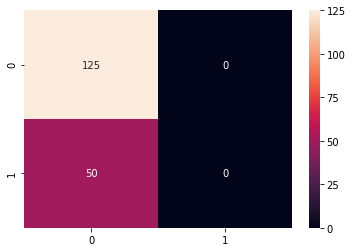

In [17]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")